<a href="https://colab.research.google.com/github/zhenglinchen1096496/DBU-Python/blob/main/AI_HW_3_Linear_Regression_with_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This code is provided for you to generate your data and split it into training and testing sets.  Do not modify.  Just run.

In [301]:
import numpy as np

In [302]:
# Generate random data for demonstration
TRUE_SLOPE = 1.75
TRUE_INTERCEPT = 1
RAND_SCALE = 0.1
RAND_SEED = 0
np.random.seed(RAND_SEED)
X = np.random.rand(100, 1)  # Feature (input)
#sort so graphs come out better
y = TRUE_SLOPE * X + TRUE_INTERCEPT + RAND_SCALE * np.random.randn(100, 1)  # Target variable (output) with some noise


#Start your code below here

In [303]:
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [304]:
# Split the data into training (80%) and testing (20%) sets
TEST_SIZE_PERCENT = 0.2
test_start_index = int((1-TEST_SIZE_PERCENT) * len(X)) #from 80% index to 100% index (20% total) for testing
X_train = X[:test_start_index]
X_test = X[test_start_index:]
y_train = y[:test_start_index]
y_test = y[test_start_index:]

In [305]:
# def z_score_normalize_features(X_train, X_test):
#     mean_X = np.mean(X_train, axis=0)
#     std_X = np.std(X_train, axis=0)

#     # mean_y = np.mean(y_train)
#     # std_y = np.std(y_train)

#     X_normalized_train = (X_train - mean_X) / std_X
#     X_normalized_test = (X_test - mean_X) / std_X

#     # y_normalized_train = (y_train - mean_y) / std_y
#     # y_normalized_test = (y_test - mean_y) / std_y

#     return X_normalized_train, X_normalized_test, mean_X, std_X


In [306]:
# X_train, X_test, mean_X, std_X = z_score_normalize_features(X_train, X_test)

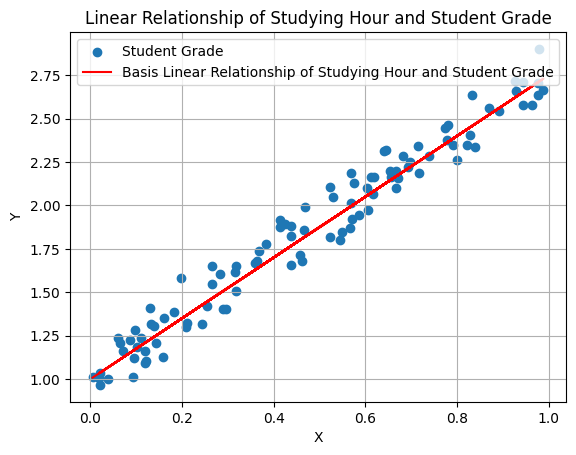

In [307]:
# Plot the data points
plt.scatter(X, y, label='Student Grade')

# Plot the basis linear relationship
y_line = TRUE_SLOPE * X + TRUE_INTERCEPT
plt.plot( X, y_line, color='red',
         #linewidth=1,
         label='Basis Linear Relationship of Studying Hour and Student Grade')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Relationship of Studying Hour and Student Grade')
plt.grid(True)
plt.show()

In [308]:
def linear_regression_nonvectorized_1D(x, y, learning_rate, epochs, early_stop=False, cost_improvement_threshold = 1e-5):

    # INITIALIZE VARIABLES
    # Initialize the coefficients (weights) with zeros
    w = 0.0  # w (slope)
    b = 0.0  # b (intercept)
    # Initialize with a large value
    prev_cost = float('inf')
    # Create list to store cost values throughout training for plotting
    cost_history = []

    # Get the number of samples m
    m = len(X_train)

    # Perform gradient descent EPOCH times to find the optimal w & b
    for epoch in range(epochs):
        dw = 0.0    # Initialize dJ/dw for this epoch
        db = 0.0    # Initialize dJ/db for this epoch
        cost = 0.0  # Initialize cost for this epoch

        # Sum gradients, dJ/dw and dJ/db, and costs over number of samples
        for i in range(m):
            # Compute loss or error for data point i
            error = w*x[i] + b - y[i]
            # Add the cost for data point i to the total
            cost += error**2
            # Compute gradients for w & b at point i
            dw += x[i] * error # dJ/dw
            db += error # dJ/db

        # Divide respective sums by number of samples
        dw /= m  # dw = dw / m
        db /= m  # db = db / m
        cost /= (2*m)  # cost = cost / (2*m)

        # Update w & b for next epoch
        w -= learning_rate * dw  # w = w - LEARNING_RATE*dw
        b -= learning_rate * db  # b = b - LEARNING_RATE*db

        # Append the cost to the history
        cost_history.append(cost)

        # Check for early stopping based on cost improvement
        if early_stop:
            if prev_cost - cost < cost_improvement_threshold:
              break
        prev_cost = cost

    return w, b, cost_history

In [309]:
# Define the learning rate and the number of epochs

LEARNING_RATE = 1.5  # best LEARNING_RATE without normalization
EPOCHS = 100         # best EPOCHS without normalization

# LEARNING_RATE = 0.33  # with normalization
# EPOCHS = 100         # with normalization

EARLY_STOP = True
COST_IMPROVEMENT_THRESHOLD = 1e-4


# Start measuring training time
start_time = time.time()

w, b, cost_history = linear_regression_nonvectorized_1D(X_train, y_train, learning_rate = LEARNING_RATE,
                                                        epochs = EPOCHS, early_stop = EARLY_STOP, cost_improvement_threshold = COST_IMPROVEMENT_THRESHOLD)

# Stop measuring training time
end_time = time.time()
training_time = end_time - start_time

In [310]:
print(w)
print(b)

[1.71294006]
[1.02026481]


In [311]:
# Make predictions using the trained model
y_pred = w*X_test + b

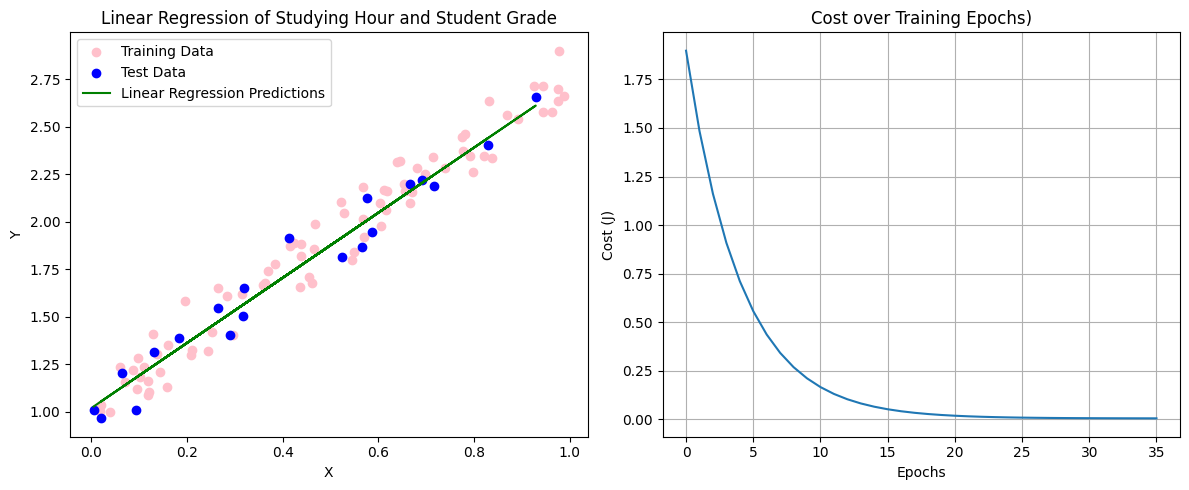

Random Basis Slope (m): 1.75          Model Slope (w): [1.71294006]
Random Basis Intercept (b): 1      Model Intercept (b): [1.02026481]
Training Time: 0.03 seconds
Training Epochs: 36
Mean Squared Error: 0.00846393635468334
R-squared (R^2) Score: 0.9634288084497532


In [312]:
# Plot the original data and the linear regression line
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='pink', label='Training Data')
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='green', label='Linear Regression Predictions')
#plt.plot(x_train, basis_y, color='red', linewidth=1, label='Basis Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression of Studying Hour and Student Grade')

# Plot the cost over epochs
plt.subplot(1, 2, 2)
plt.plot(range(len(cost_history)), cost_history)
# epochs_to_plot = 11
# plt.plot(range(epochs_to_plot), cost_history[:epochs_to_plot])
plt.xlabel('Epochs')
plt.ylabel('Cost (J)')
plt.title('Cost over Training Epochs)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Print training outcomes
#print("Final cost:", cost_history[-1])
print("Random Basis Slope (m):", TRUE_SLOPE, "         Model Slope (w):", w)
print("Random Basis Intercept (b):", TRUE_INTERCEPT, "     Model Intercept (b):", b)
print(f"Training Time: {training_time:.2f} seconds")
print("Training Epochs:", len(cost_history))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R-squared (R^2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) Score:", r2)


1.The data of a student who was either a genius or had extensive prior experience with the subject will appear in the Left Upper Region.
The regression line is pulled upward, the intercept may increase but the slope may slow down. As the error increases, the Mean Squared Error increases and the R-squared (R^2) Score decreases. Predictions for the grade of average student may be higher than their actual grade.

2.For students who tried hard but struggled to perform well in the subject, their data located in the Right Lower Region. The regression line is pulled downward, the intercept may decrease but the slope may speed up.In the same way, as the error increases, the Mean Squared Error increases and the R-squared (R^2) Score decreases. The model may underestimate the average student's achievement.

3(1). Maintain outliers:

Reason: These outliers may represent real differences in learning patterns or ability. For example, gifted students may achieve high scores in a shorter period of time due to differences in talent or learning strategies; The students who work hard but do not do well may reflect the factors of improper learning methods and higher difficulty of courses.

Action: Choose not to remove these points because they help the model more fully understand the distribution and trends of the data. In fact, such data can improve the predictive power of the model, especially when the model needs to show generalization ability on new data.

3(2). Use robust models:

Reason: Some models are less sensitive to outliers, such as random forests or tree-based models.

Practice: Choosing these models can reduce the negative impact of outliers on model training while preserving the information provided by these data.
